#### LightGBM
##### LightGMB이란?
- Gradient Boosting framework로 Tree기반 학습 알고리즘이다.

- XGBoost의 시간적 한계를 보완할 알고리즘

- LightGBM은 leaf-wise인 반면 다른 알고리즘은 level-wise이다. → level-wise보다 더 많은 loss를 줄일 수 있다.


#### parameter
- n_estimators: 반복하려는 트리의 개수
- learning_rate: 트리의 최대 깊이
- min_child_samples:리프 노드가 되기 위한 최소한의 샘플 데이터 수
- num_leaves: 하나의 트리가 가질 수 있는 최대 리프 개수
- feature_fraction: 트리를 학습할 때마다 선택하는 feature의 비율
- reg_lambda:L2 regularization
- reg_alpha:L1 regularization

참고:https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [1]:
!pip install lightgbm

You should consider upgrading via the 'c:\users\hyemi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgb = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)



[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

LGBMClassifier(n_estimators=400)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

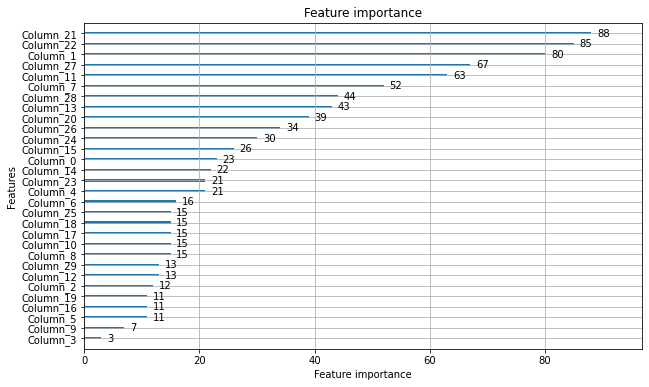

In [8]:
fig,ax=plt.subplots(figsize=(10,6))
plot_importance(lgb,ax=ax)